In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setting up Plots

In [54]:
plt.style.use('ggplot') # use print(plt.style.available) to see other styles
sns.set_context('notebook') # paper, notebook, talk, poster
sns.set_style('ticks')  # show ticks

# Used Datasets

In [55]:
print(sns.get_dataset_names())  # built-in datasets in seaborn

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


# **Correlation**


In [56]:
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [57]:
np.corrcoef(mpg['cylinders'], mpg['mpg']) # need to remove NaNs for statistics using Numpy

array([[ 1.        , -0.77539629],
       [-0.77539629,  1.        ]])

In [58]:
mpg['cylinders'].corr(mpg['mpg']) # same as above, but no need to remove NaNs for statistics using Pandas

-0.7753962854205543

In [59]:
mpg.corr()  # correlations between all quantitative variables

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Selecting quantatative variables and then filling missing values by column means

In [60]:
mpg_num = mpg._get_numeric_data()

In [61]:
mpg_num.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [62]:
mpg_num = mpg_num.fillna(mpg_num.sum())
mpg_num.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

Pair plots between columns: Looking for a variable that is related to other variables

In [63]:
#sns.pairplot(mpg_num, kind='reg', diag_kind='kde')
#plt.show()

Correlations between columns and then visualizing them using a heat map: Looking for a variable that is related to other variables

In [64]:
mpg_num.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,0.065174,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,-0.075235,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,-0.069687,0.932824,-0.543684,-0.370164
horsepower,0.065174,-0.075235,-0.069687,1.000000,-0.061824,0.073298,0.063508
weight,-0.831741,0.896017,0.932824,-0.061824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,0.073298,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,0.063508,-0.306564,0.288137,1.000000


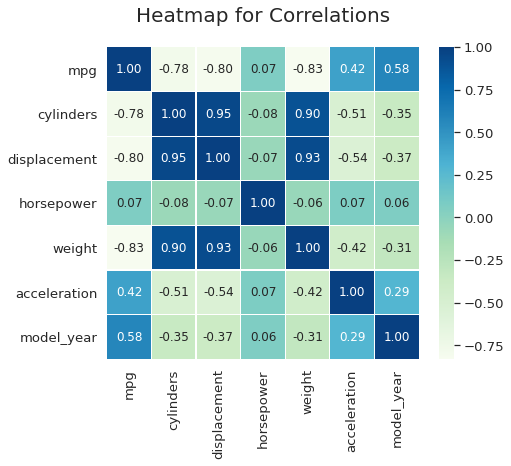

In [65]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots()
fig.set_size_inches([7, 7])
sns.heatmap(ax=ax, data=mpg_num.corr(), cbar=True, annot=True, square=True, cmap='GnBu', fmt='.2f', annot_kws={'size':12}, 
            xticklabels=mpg_num.columns, yticklabels=mpg_num.columns, cbar_kws={"shrink": .82}, linewidths=0.2)
ax.set_title('Heatmap for Correlations', size=20, pad=25)  # pad: spacing title from the plot
plt.show()

# **Linear Regression of Two Variables**

Linear regression using Numpy Polyfit

In [66]:
slope, intercept = np.polyfit(mpg['weight'], mpg['mpg'], 1) # third parameter is about degree of polynomial
print(slope, intercept)

-0.0076766100639264765 46.31736442026564


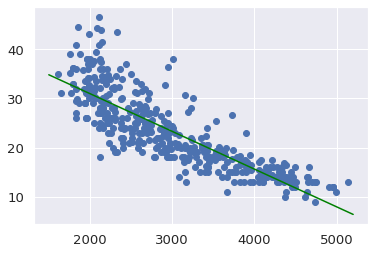

In [67]:
xlim = np.array([1500, 5200])
plt.scatter(mpg['weight'], mpg['mpg'])
plt.plot(xlim, slope*xlim + intercept, color='green')
plt.show()

Pairs Bootstrap for Regressions

In [68]:
inds = np.arange(0, len(mpg))
boot_inds = np.random.choice(inds, size=len(inds))
np.polyfit(mpg['weight'][boot_inds], mpg['mpg'][boot_inds], 1)

array([-7.46880046e-03,  4.56622572e+01])

Linear regression using Sklearn LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Linear regression between two variables

In [70]:
X = mpg['weight'].values.reshape(-1, 1) # reshape(-1, 1): nrow is unknown and ncol = 1
y = mpg['mpg']

In [71]:
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Same as above

In [72]:
LinReg.coef_, LinReg.intercept_

(array([-0.00767661]), 46.31736442026563)

In [73]:
LinReg.score(X, y)  # R^2 for the model

0.6917929800341575

Same as above

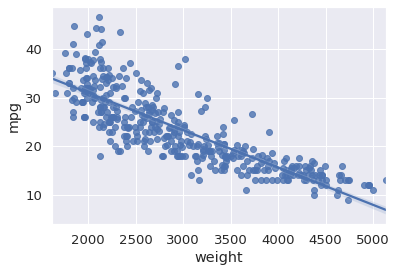

In [74]:
sns.regplot(data=mpg, x='weight', y='mpg')  # x_bins=10 to divide the x-axis into 10 bins
plt.show()

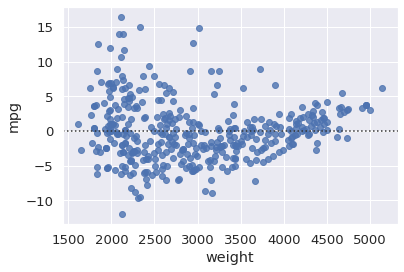

In [75]:
sns.residplot(data=mpg, x='weight', y='mpg')

Thus, a linear regression is NOT good. Try a degree 2 polynomial regression.

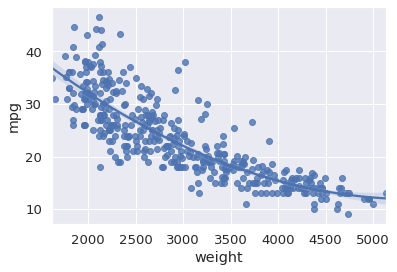

In [76]:
sns.regplot(data=mpg, x='weight', y='mpg', order=2)

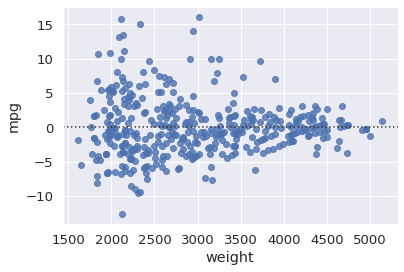

In [77]:
sns.residplot(data=mpg, x='weight', y='mpg', order=2)

This residual plot is more random than the linear residual plot.

Multiple linear regressions between two variables by faceting

<function matplotlib.pyplot.show>

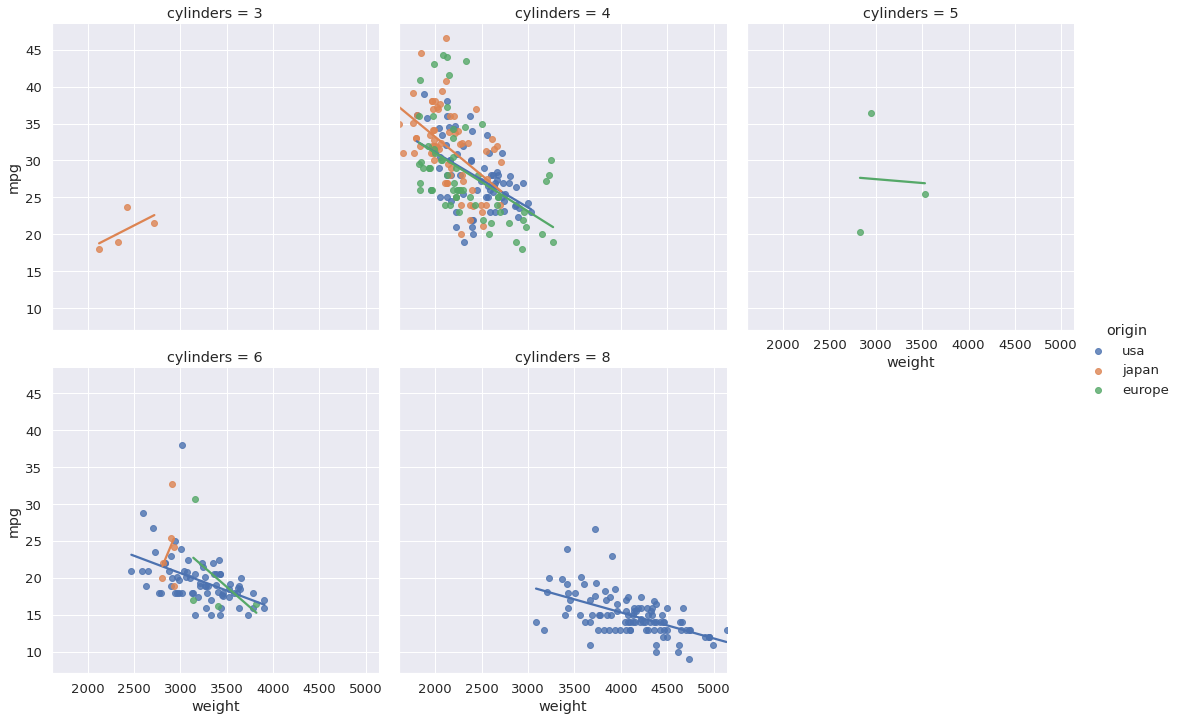

In [78]:
sns.lmplot(data=mpg, x='weight', y='mpg', hue='origin', col='cylinders', col_wrap=3, ci=None)
plt.show

# **Linear Regression of Multiple Variables**

Creating two sets of subdata containing only quantatative variables from the dataset focusing on 'mpg'

In [79]:
X = mpg_num[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = mpg_num['mpg']

Dividing the two data into train and test sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

Training the algorithm

In [81]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients of the regression model: Coefficients in multiple linear models represent the relationship between the given feature, X_i and the target, y, assuming that all the other features remain constant (conditional dependence). This is different from plotting  X_i versus y and fitting a linear relationship: in that case all possible values of the other features are taken into account in the estimation (marginal dependence).

For example, y = 2*X_1 takes the other features into account; they are confounding the relationship. The slope may change if we control for the other features,e.g.,  y=3*X_1 + X_2 + 5*X_3. 

In [82]:
pd.DataFrame(LinReg.coef_, X.columns, columns=['mpg'])

,mpg
cylinders,-0.325064
displacement,0.000827
horsepower,0.000003
weight,-0.006766
acceleration,0.309858


In [83]:
LinReg.intercept_

40.35070753986848

Making predictions on the test data

In [84]:
y_predict = LinReg.predict(X_test)
resid = y_test - y_predict
resid.head()

134   -3.616525
137    2.261465
13    -6.345168
95     3.964003
263   -1.734266
Name: mpg, dtype: float64

Computing the mean square error (MSE)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = y_test, y_pred = y_predict)

20.82882421368532

In [86]:
mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train))

17.264932949721928

R^2 for the model

In [87]:
LinReg.score(X_test, y_test)

0.694614396862713

Histogram of the residuals: Looking for a roughly symmetric and bell-shaped histogram centered at about zero for a valid underlying assumption for inference

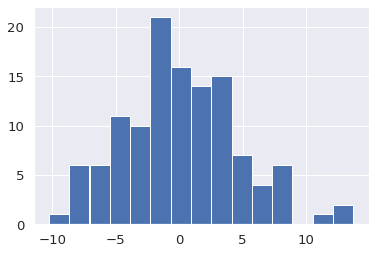

In [88]:
plt.hist(resid, bins=15)
plt.show()

Ideally, residual values should be equally and randomly spaced around the horizontal axis. Thus, the residual plot below is NOT good.

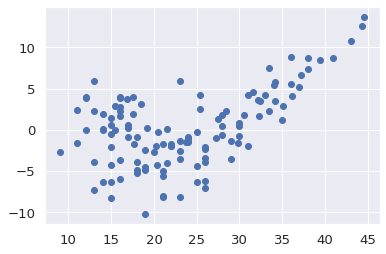

In [89]:
plt.scatter(y_test, resid)
plt.show()

# **Logistic Regression**

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

In [99]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
X = diabetes.iloc[:, 0:-1]
y = diabetes['Outcome']
X.head(), y.head()

(   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
 0            6      148             72  ...  33.6                     0.627   50
 1            1       85             66  ...  26.6                     0.351   31
 2            8      183             64  ...  23.3                     0.672   32
 3            1       89             66  ...  28.1                     0.167   21
 4            0      137             40  ...  43.1                     2.288   33
 
 [5 rows x 8 columns], 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

It’s usually better to evaluate the model with the data that were not uesed for training. That’s how we avoid bias and detect overfitting. 

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [102]:
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)

In [103]:
print('Classes: {}, Intercept: {}, Coefficients: {}'.format(LogReg.classes_, LogReg.intercept_, LogReg.coef_))

Classes: [0 1], Intercept: [-0.8106916], Coefficients: [[ 0.29286006  1.03288106 -0.20519002  0.09191431 -0.11308546  0.68771364
   0.29190585  0.26366929]]


In [104]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[118,  12],
       [ 26,  36]])

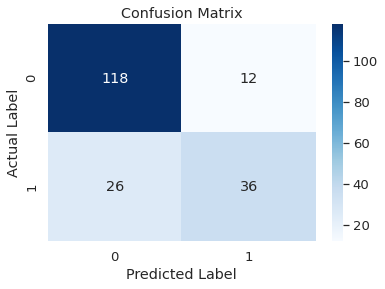

In [105]:
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Precision:** Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

**Recall:** Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

**F1 Score:** It is the harmonic mean (2xy/(x+y)) of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support:** It is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. 

In [106]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8020833333333334
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [107]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


**Receiver Operating Characteristic(ROC)** curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

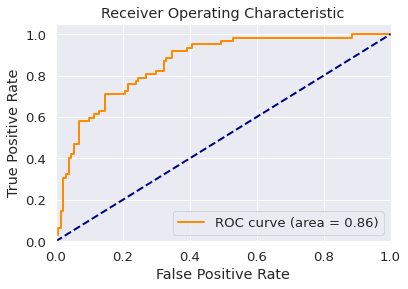

In [108]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Compute the area under the curve (AUC)

In [109]:
roc_auc_score(y_test, y_pred_proba)

0.8595533498759305